In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torch.functional import F

In [9]:
BATCH_SIZE = 256
EPOCHS = 50

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                          transforms.ToTensor()
                     ])),
   batch_size=BATCH_SIZE, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
   batch_size=BATCH_SIZE, shuffle=True
)


In [4]:
device, \
train_loader, \
test_loader

(device(type='cuda'),
 <torch.utils.data.dataloader.DataLoader at 0x21683047c90>)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
losses = []
accuracies = []
for epoch in range(EPOCHS):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    losses.append(loss.item())
    accuracies.append(100 * correct / total)
    print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}, Eval Accuracy: {100 * correct / total:.2f}%')

Epoch 1, Training Loss: 0.1180, Eval Accuracy: 95.84%
Epoch 2, Training Loss: 0.1395, Eval Accuracy: 96.89%
Epoch 3, Training Loss: 0.0490, Eval Accuracy: 97.51%
Epoch 4, Training Loss: 0.0907, Eval Accuracy: 97.79%
Epoch 5, Training Loss: 0.0239, Eval Accuracy: 97.91%
Epoch 6, Training Loss: 0.0276, Eval Accuracy: 97.93%
Epoch 7, Training Loss: 0.0083, Eval Accuracy: 97.80%
Epoch 8, Training Loss: 0.0248, Eval Accuracy: 97.06%
Epoch 9, Training Loss: 0.0045, Eval Accuracy: 98.07%
Epoch 10, Training Loss: 0.0024, Eval Accuracy: 98.21%
Epoch 11, Training Loss: 0.0040, Eval Accuracy: 97.66%
Epoch 12, Training Loss: 0.0363, Eval Accuracy: 97.73%
Epoch 13, Training Loss: 0.0009, Eval Accuracy: 98.24%
Epoch 14, Training Loss: 0.0003, Eval Accuracy: 97.89%
Epoch 15, Training Loss: 0.0004, Eval Accuracy: 97.90%
Epoch 16, Training Loss: 0.0205, Eval Accuracy: 97.99%
Epoch 17, Training Loss: 0.0012, Eval Accuracy: 97.97%
Epoch 18, Training Loss: 0.0471, Eval Accuracy: 98.00%
Epoch 19, Training 

In [7]:
losses ,\
accuracies

([0.13760504126548767,
  0.0743187665939331,
  0.03608240187168121,
  0.0431271456182003,
  0.02629033662378788,
  0.03664177283644676,
  0.012665480375289917,
  0.03464674577116966,
  0.016257861629128456,
  0.008340179920196533],
 [95.45, 96.92, 97.53, 97.31, 97.84, 97.8, 97.89, 98.17, 98.04, 98.18])

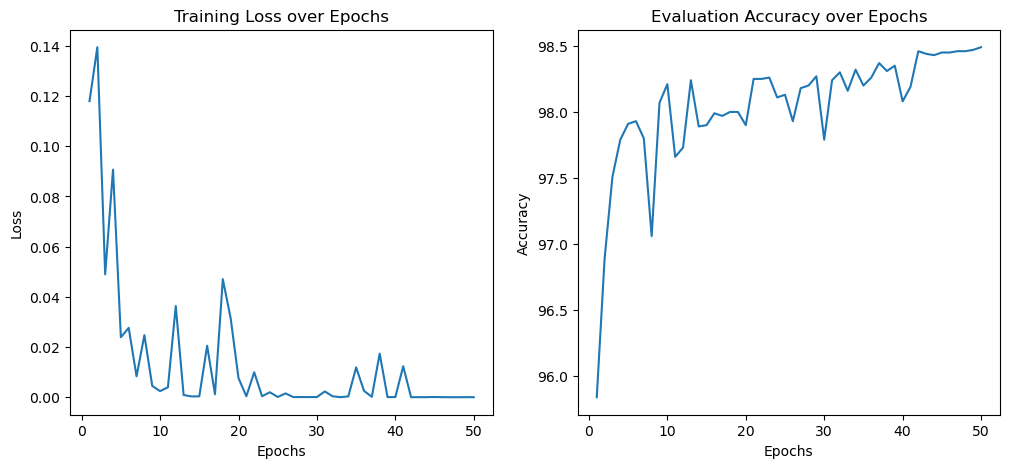

In [11]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1,EPOCHS+1),losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,EPOCHS+1),accuracies)
plt.title('Evaluation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()